# Week 10 Workshop
## 2D Signal Processing 

This workshop is at the boundary of our decision to place computer vision outside the scope of TRC3500. A lot of these techniques are helpful in computer vision, but we're choosing to focus on non-camera sensing technologies as these are often ignored in core computer vision exercises. 

## The Data Set
We've downloaded a sonar-for-mine-detection data set to explore during these exercises. There are more open-sonar data sets here (https://github.com/remaro-network/OpenSonarDatasets) if you are interested. 

## Exercise 1: Visualising 2D Data
There are a number of tools for visualising 2D data. We'll start with Matplotlib. The most basic is `imshow()` - it takes one matrix of Z values, with the X and Y positions of each value inherent in the dimensions in the matrix. 

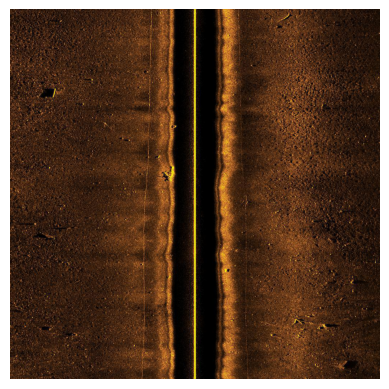

In [6]:
# matplotlib: imshow (Z) 
import matplotlib.pyplot as plt

imPath = '/Users/earsenau/Documents/data/Week10Data/0001_2015.jpg'
boxPath = '/Users/earsenau/Documents/data/Week10Data/0001_2015.txt'
# load and show an image using matplotlib (Z)
im = plt.imread(imPath)
plt.imshow(im)
plt.axis('off')  # Hide the axis
plt.show()



These are pseudocolour images - the RGB encoding is redundant (and triples the computational resources required for analysis). For 2-D bitmaps that are one-channel intensity maps, we can be more efficient.

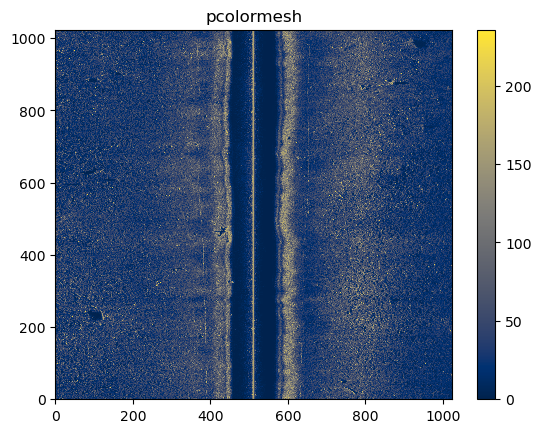

In [7]:
# matplotlib: pcolormesh / contour / contourf (X,Y,Z)
# convert im to grayscale, and a numpy array
import numpy as np
im = plt.imread(imPath)
im = np.mean(im, axis=2)  # Convert to grayscale
# create a grid of x and y values
[x, y] = np.meshgrid(np.arange(im.shape[1]), np.arange(im.shape[0]))

#visualize the image using pcolormesh
plt.pcolormesh(x, y, im, shading='auto', cmap='cividis')
plt.colorbar()
plt.title('pcolormesh')
plt.show()


If you're confused about the `meshgrid` function, have a look at its (2D) outputs. 

## Drawing the bounding boxes... 

[[102.5, 232.0, 55.0, 30.0], [440.5, 455.0, 39.0, 56.0], [602.0, 725.0, 22.0, 20.0], [862.5, 880.0, 31.0, 20.0], [175.5, 900.0, 25.0, 18.0], [936.5, 982.0, 49.0, 28.0]]


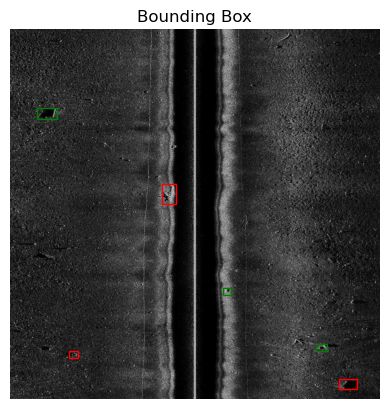

In [42]:
from matplotlib.patches import Rectangle

# Define the vertices of the bounding box
# load and parse the bouning box text file 
# format is cat x y w h 

normalise = [im.shape[1], im.shape[0], im.shape[1], im.shape[0]]

allVertices = []
eventClass = []

with open(boxPath, 'r') as f:
    # read each line in the file
    # and parse the vertices
    for line in f:
        line = line.strip()
        parts = line.split()
        eventClass.append(parts[0]) # first part is the class
        vertices = list(map(float, parts[1:]))  # Convert to float
        vertices = [n*v for v, n in zip(vertices, normalise)] # given as proportions so normalise back to image coordinates
        
        allVertices.append(vertices)
f.close()


# Plot the grayscale image
plt.imshow(im, cmap='gray', origin='upper')
plt.axis('off')  # Hide the axis
print(allVertices)

# Add each bounding box
for i in range(0, len(allVertices)):
    if eventClass[i] == '1':
        eColor = 'red'
    else: 
        eColor = 'green'
    
    w = allVertices[i][2]; h = allVertices[i][3]
    x = allVertices[i][0]-w/2; y = allVertices[i][1]-h/2 
    rect = Rectangle((x,y), w,h,  # width, height
                     linewidth=1, edgecolor=eColor, facecolor='none')
    plt.gca().add_patch(rect)


plt.title('Bounding Box')
plt.show()

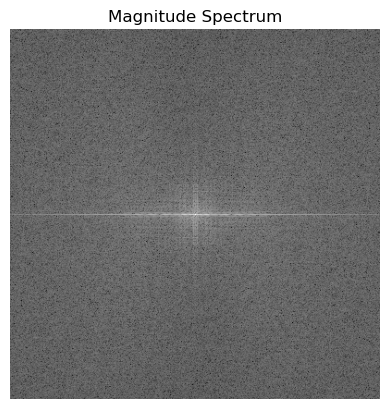

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
size = 200;

f = np.fft.fft2(im)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))
# crop into center
h, w = magnitude_spectrum.shape
center_x, center_y = w // 2, h // 2
cropped_spectrum = magnitude_spectrum[center_y-size:center_y+size, center_x-size:center_x+size]

# Display the magnitude spectrum
plt.imshow(cropped_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()


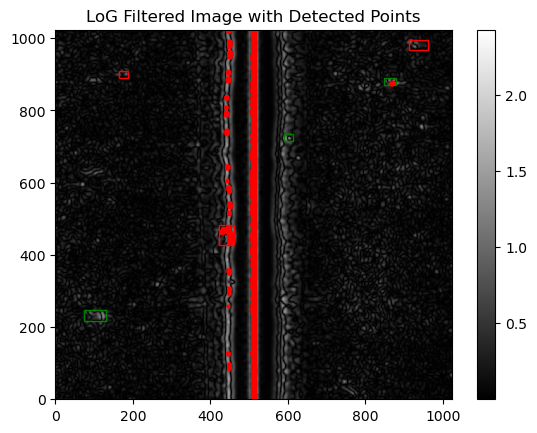

In [71]:
# LoG filter the image
from scipy.ndimage import gaussian_laplace

[xmesh, ymesh] = np.meshgrid(np.arange(im.shape[1]), np.arange(im.shape[0]))
imfilt= gaussian_laplace(im, sigma=5)
plt.pcolormesh(xmesh,ymesh,np.abs(imfilt), cmap='gray', zorder=0)
# show colorbar
#plt.colorbar()
# Add each bounding box
for i in range(0, len(allVertices)):
    if eventClass[i] == '1':
        eColor = 'red'
    else: 
        eColor = 'green'
    
    w = allVertices[i][2]; h = allVertices[i][3]
    x = allVertices[i][0]-w/2; y = allVertices[i][1]-h/2 
    rect = Rectangle((x,y), w,h,  # width, height
                     linewidth=1, edgecolor=eColor, facecolor='none')
    plt.gca().add_patch(rect)

# find the x and y coordinates of all values greater than 4
xpeak, ypeak = np.where(np.abs(imfilt) > 1.5)
# plot the points
plt.gca().scatter(ypeak, xpeak, marker='x', c='red', s=4, zorder=1)  # s is the size of the points
plt.colorbar()
plt.title('LoG Filtered Image with Detected Points')
plt.show()

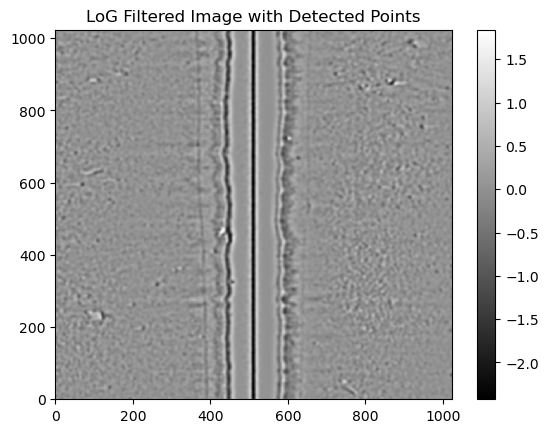

In [98]:
# LoG filter the image
from scipy.ndimage import gaussian_laplace

[xmesh, ymesh] = np.meshgrid(np.arange(im.shape[1]), np.arange(im.shape[0]))
imfilt= gaussian_laplace(im, sigma=5)
plt.pcolormesh(xmesh,ymesh,imfilt, cmap='gray', zorder=0)
# show colorbar
#plt.colorbar()

plt.colorbar()
plt.title('LoG Filtered Image with Detected Points')
plt.show()